# PROCCESING EPR DATA
TODO сделать аналогично 154


In [1]:
import numpy as np 
import matplotlib.pyplot as plt
from matplotlib.collections import PolyCollection
import os
import pandas as pd
from scipy import integrate
from sympy import diff
import glob
import scipy
import seaborn as sns
current_palette = sns.color_palette("muted")
import matplotlib as mpl
from pylab import cm
import matplotlib.font_manager


plt.style.use('default')
plt.rcParams.update({'figure.figsize':(5.425197, 4.0688),
                     'text.usetex': False,
                     'font.family': 'sans',
                     'font.sans-serif': 'Linux Biolinum',
                     'font.size': 14,
                     'mathtext.fontset': 'custom',
                     'mathtext.rm': 'Linux Biolinum',
                     'mathtext.it': 'Linux Biolinum:italic',
                     'mathtext.bf': 'Linux Biolinum:bold',
                     'lines.linewidth': 2.5,
                     'xtick.labelsize': 18,
                     'ytick.labelsize': 18,
                     'axes.titlesize': 18,
                     'axes.labelsize': 18,
                     'legend.frameon': True,
                     'legend.fancybox': True,
                     'legend.fontsize': 9,
                     'legend.framealpha': 0,
                     'legend.handletextpad': 0.5,
                     'legend.labelspacing': 0.2,
                     'legend.borderpad': 0.5,
                     'legend.loc': 'best',
                     'savefig.dpi': 600,
                     'pdf.compression': 9})

## Generation raw data

## Import Data
лечге всего руками сделать итоговый файл и с ним уже работать

In [2]:
save_fig = '/Users/smoluakov/Documents/DIPLOMA/DATA_PROCCESING/CD220/IMAGES/EPR'

In [4]:
directory = '/Users/smoluakov/Documents/DIPLOMA/EPR_DATA/16.03_CD220/EXCEL/generation/excel'
#list_of_files = sorted(os.listdir(directory))

data = pd.read_excel(directory+'/'+'cd220_full.xlsx')

In [5]:
data

,X (500 points),Y8,Y10,Y13,Y16,Y19,Y21,Y24,Y27,Y30,Y33,Y37,Y40,Y43,Y46,Y49,Y52,Y55,Y58,Y62
0,332.87796,-54.844490,-1.979075,-3889.725586,-65.482475,-105.309326,-143.753448,4148.699707,-161.047775,-30.958008,-123.777443,-99.125618,23.467772,-149.277847,-118.219421,-246.471451,-141.210693,-149.001099,-135.961136,-137.589813
1,332.88797,-48.160980,172.333176,213.199799,-7.261068,-115.793007,-127.857300,-5945.437988,-238.410126,-221.180695,-252.700241,-203.964798,-16.033949,136.558655,-9.845427,128.625641,3.717424,-36.481800,-99.030602,-264.237854
2,332.89798,98.131050,32.029629,3529.387695,-216.245773,-88.277122,-237.485626,-123.535767,-294.322205,-138.444321,-400.325775,-226.723633,-29.296431,25.272146,-87.372162,-81.083260,-163.467957,-159.282608,-167.396805,-183.305832
3,332.90802,2.690871,-161.527008,6820.051758,-264.491089,-133.137466,-4.395548,-158.742950,31.759354,-186.772064,-82.724609,-123.323097,-94.612091,11.213063,-269.074768,-190.503616,-217.728577,-209.438004,-139.537125,-195.916382
4,332.91803,-209.622849,307.145264,-11238.734375,140.910278,-115.877441,-22.723747,-260.046295,-242.365677,-281.721466,-310.846069,-248.234344,236.764893,88.264748,141.656754,-55.598721,61.777443,-107.256096,-88.241852,-127.795250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,337.83786,-15.155713,-330.692383,-196.388779,-258.511963,-306.780731,-319.601013,-219.111954,-286.712646,-430.818909,-350.853699,-678.082520,-218.206543,-475.379150,-447.731873,-376.115967,-497.521454,-493.968414,-524.716919,-478.698853
496,337.84790,-119.913628,10656.593750,-422.827881,-314.079285,-387.390503,-293.682892,-338.308197,-418.826752,-284.968140,-438.265442,-360.925873,-150.728333,-336.927307,-257.396637,-535.415710,-403.518280,-577.383789,-468.936768,-611.432251
497,337.85791,-131.621750,-13611.496094,22.750782,-142.084183,-48.313786,-198.167847,-150.199966,-293.254425,-356.418121,-490.946869,-529.657532,-261.927612,-192.743362,-319.526917,-208.174179,-333.642334,-273.901886,-313.571838,-345.208252
498,337.86792,-112.160515,-21.138138,-219.144775,-224.839355,-223.645050,-399.129150,-347.685242,-413.114014,-329.623077,-544.395874,-351.657104,-329.980774,-260.102539,-412.586212,-504.368622,-383.066498,-484.071014,-450.547150,-497.689575


In [6]:
data.columns

Index(['X (500 points)', 'Y8', 'Y10', 'Y13', 'Y16', 'Y19', 'Y21', 'Y24', 'Y27',
       'Y30', 'Y33', 'Y37', 'Y40', 'Y43', 'Y46', 'Y49', 'Y52', 'Y55', 'Y58',
       'Y62'],
      dtype='object')

In [77]:
x = data['X (500 points)']

<AxesSubplot:xlabel='X (500 points)'>

<Figure size 1500x800 with 0 Axes>

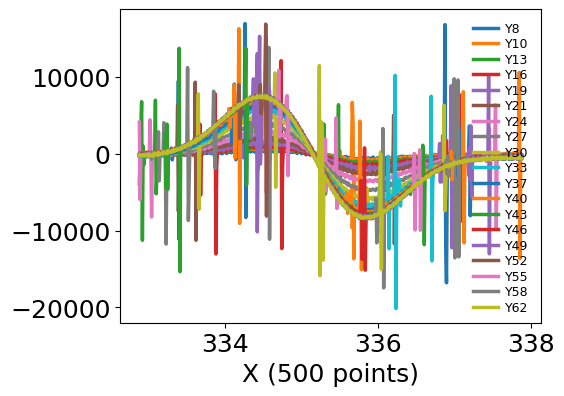

In [78]:
plt.figure(figsize=(15,8))
data.plot(x='X (500 points)', y=['Y8', 'Y10', 'Y13', 'Y16', 'Y19', 'Y21', 'Y24', 'Y27',
       'Y30', 'Y33', 'Y37', 'Y40', 'Y43', 'Y46', 'Y49', 'Y52', 'Y55', 'Y58',
       'Y62'],)

In [79]:
y_full = data.drop(['X (500 points)','Y55','Y62'], axis=1)
y_names = list(y_full.columns)

## Очиста данных от шума

In [80]:

for name in y_names:
    for i in range(1,len(y_full[name])):
        if abs(diff(y_full[name])[i]) < 700:
            y_full[name][i] = y_full[name][i]
        else:
            y_full[name][i] = (np.mean(y_full[name][i-7:i-5]))
        #y_full[name][i] = y_full[name][i] if abs(diff(y_full[name])[i]) < 350 else y_full[name][i] = (np.mean(y_full[name][i-11:i-5]));

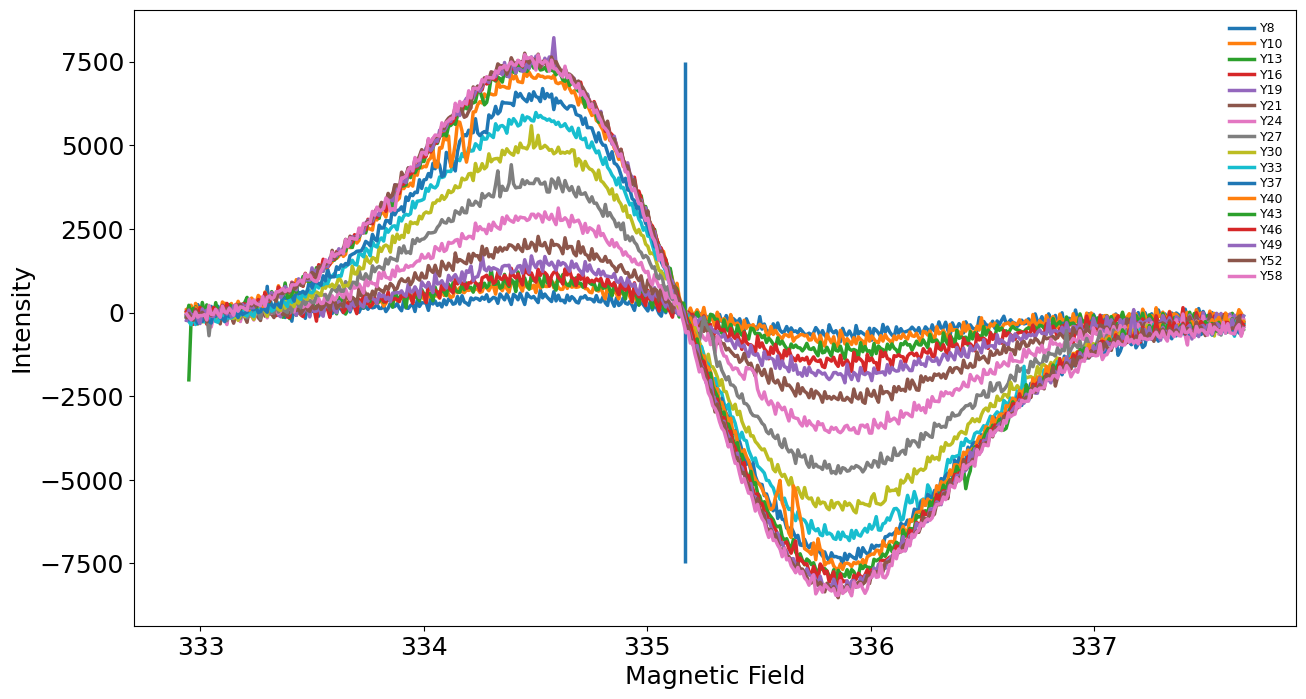

In [81]:
import seaborn as sns
plt.figure(figsize=(15,8))
plt.xlabel('Magnetic Field')
plt.ylabel('Intensity')
#plt.vlines(335.38, -7500,7500)
plt.vlines(335.17, -7500,7500)
for name in y_names:
    plt.plot(x[6:-21], y_full[name][6:-21], label=name) # посчитал в экселе сколько между 335.17 и 335.38 точек
    plt.legend()
    

## Сглаживание данных 

In [12]:
len(y_names)


17

In [13]:
list(range(10,40,3))

[10, 13, 16, 19, 22, 25, 28, 31, 34, 37]

In [14]:
time = [8,10, 13, 16, 19, 22, 25, 28, 31, 34, 37,40, 43, 46, 49, 52, 58]

In [15]:
len(time)

17

In [116]:
y_names

['Y8',
 'Y10',
 'Y13',
 'Y16',
 'Y19',
 'Y21',
 'Y24',
 'Y27',
 'Y30',
 'Y33',
 'Y37',
 'Y40',
 'Y43',
 'Y46',
 'Y49',
 'Y52',
 'Y58']

In [253]:
colors

[<Color #05f>,
 <Color #0af>,
 <Color cyan>,
 <Color #0fa>,
 <Color #0f5>,
 <Color lime>,
 <Color #5f0>,
 <Color #af0>]

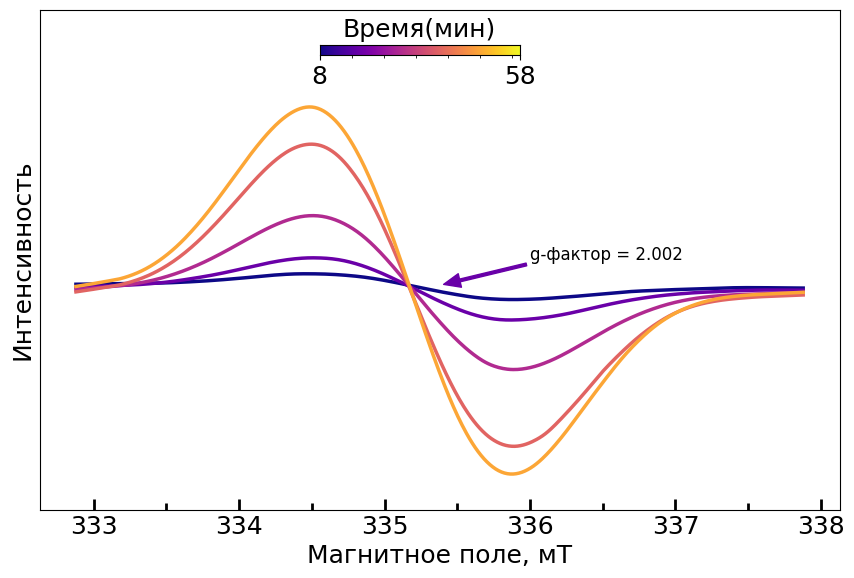

In [274]:
from statsmodels.nonparametric.smoothers_lowess import lowess
import seaborn as sns

fig = plt.figure(figsize=(8,5))
ax = plt.gca()
ax = fig.add_axes([0,0,1,1])

#plt.figure(figsize=(8,5))
plt.xlabel('Magnetic Field')
plt.ylabel('Intensity')
#plt.vlines(335.38, -7500,7500)
#plt.vlines(335.17, -4500,4500)

ax.xaxis.set_tick_params(which='major', size=8, width=2, direction='in', bottom='on')
ax.xaxis.set_tick_params(which='minor', size=5, width=2, direction='in', bottom='on')
ax.yaxis.set_tick_params(which='major', size=8, width=2, direction='in', left='on')
ax.yaxis.set_tick_params(which='minor', size=5, width=2, direction='in', left='on')


ax.xaxis.set_major_locator(mpl.ticker.MultipleLocator(1))
ax.xaxis.set_minor_locator(mpl.ticker.MultipleLocator(0.5))

#ax.yaxis.set_major_locator(mpl.ticker.MultipleLocator(3000))
#ax.yaxis.set_minor_locator(mpl.ticker.MultipleLocator(1500))

ax.set_xlabel('Магнитное поле, мТ')
ax.set_ylabel('Интенсивность')
ax.set_yticks([])


for i,name in enumerate(y_names[0::3]):
    if i ==5:
        continue
    filtered = lowess(y_full[name], x, is_sorted=True, frac=0.125, it=2)
    ax.plot(filtered[:,0], filtered[:,1],color=cm.plasma(i/5),label=time[i])
    #ax.legend(title="Время(мин)",fontsize =7,title_fontsize=9,bbox_to_anchor=(0.85, 0.5)) 
ax.set_ylim([-9000, 11000])
ax.annotate('g-фактор = 2.002 ', xy=(335.4, 0), xytext=(336, 1000.7),
            arrowprops=dict(color=cm.plasma(50),width=2,headwidth=10, shrink=0.01), fontsize=12)
    
cmap = plt.cm.get_cmap('plasma')
colors = cmap(np.arange(cmap.N))   
cmap = grayscale_cmap(cmap)
grayscale = cmap(np.arange(cmap.N))    
#plt.savefig('relaxation.png', bbox_inches='tight')
newax = fig.add_axes([0.35, 0.73, 0.25, 0.2], anchor='NE')
newax.imshow([colors],origin='upper', extent=[8, 58, 0.5, 3],)    
newax.axes.get_yaxis().set_visible(False)
#newax.yaxis.set_tick_params(which='minor', size=5, width=2, direction='in', left='on')
newax.xaxis.set_major_locator(mpl.ticker.MultipleLocator(8))
newax.xaxis.set_minor_locator(mpl.ticker.MultipleLocator(8))
newax.set_xticks([8,58])
newax.set_title('Время(мин)')
#plt.plot(x, y_full[y_names[10]], 'r')
#plt.plot(filtered[:,0], filtered[:,1], 'b')

plt.savefig(save_fig+'/generation.png', bbox_inches='tight')

In [17]:
directory = '/Users/smoluakov/Documents/DIPLOMA/EPR_DATA/16.03_CD220/EXCEL/generation/excel'
#list_of_files = sorted(os.listdir(directory))
data_small = pd.read_excel(directory+'/'+'cd220_gen_small.xlsx')
time_small = [8,24,37,58]
y_small = data_small.drop(['X (500 points)'], axis=1)
y_names_small = list(y_small.columns)

for name in y_names_small:
    for i in range(1,len(y_small[name])):
        if abs(diff(y_small[name])[i]) < 700:
            y_small[name][i] = y_small[name][i]
        else:
            y_small[name][i] = (np.mean(y_small[name][i-7:i-5]))
        #y_full[name][i] = y_full[name][i] if abs(diff(y_full[name])[i]) < 350 else y_full[name][i] = (np.mean(y_full[name][i-11:i-5]));

In [18]:
len(filtered[:,1])

500

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


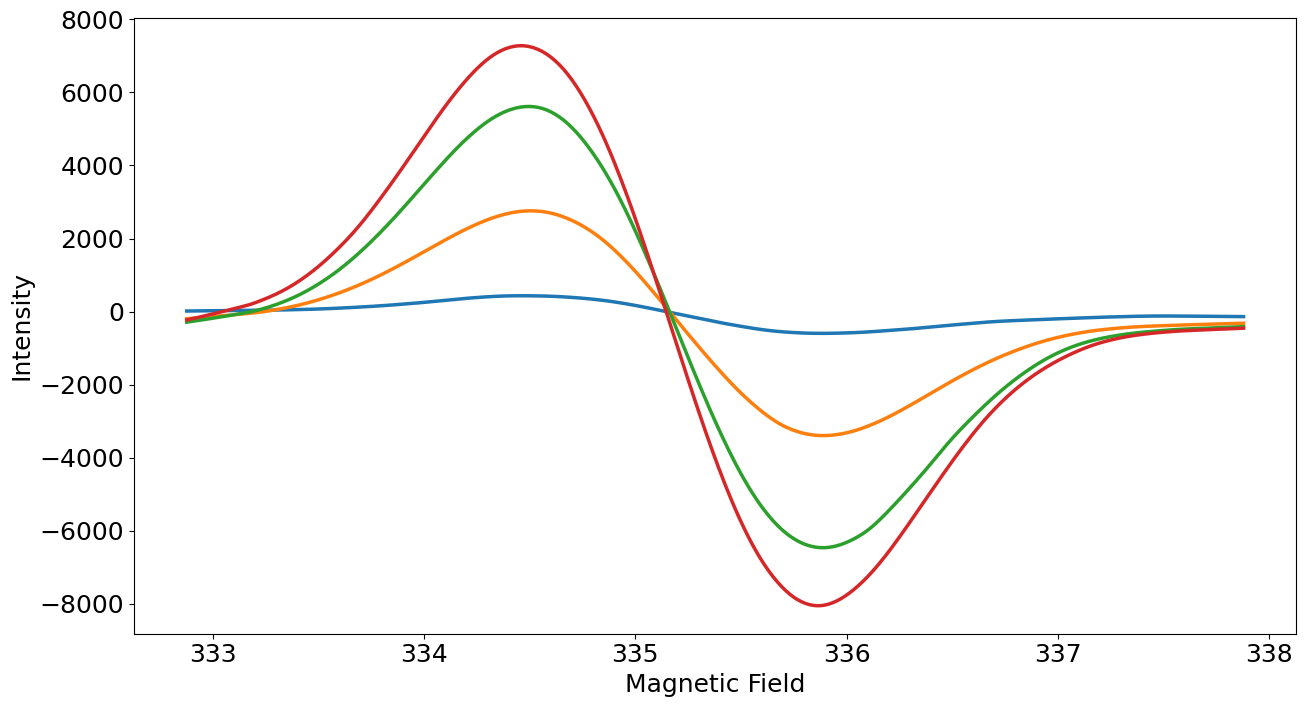

In [19]:
import seaborn as sns
plt.figure(figsize=(15,8))
plt.xlabel('Magnetic Field')
plt.ylabel('Intensity')
#plt.vlines(335.38, -7500,7500)
#plt.vlines(335.17, -7500,7500)
for name in y_names_small:
    filtered = lowess(y_small[name], x, is_sorted=True, frac=0.125, it=2)
    plt.plot(filtered[:,0], filtered[:,1])
    
    plt.legend()

In [20]:
len(filtered[:,0])

500

In [21]:
len(filtered[:498,1])

498

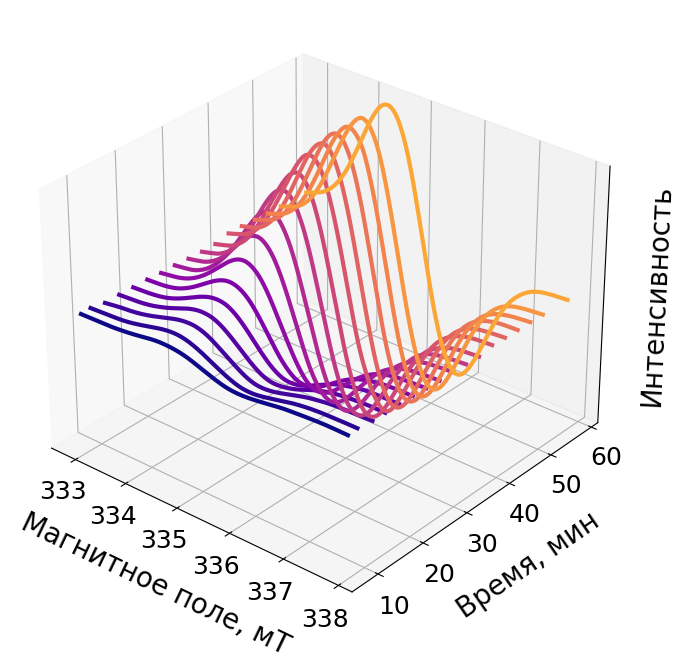

In [273]:
from matplotlib.collections import PolyCollection

fig = plt.figure(figsize=(8,8))
verts = []
ax = fig.add_subplot(projection='3d')


#for name in y_names:
ax.view_init(30, -50)
for i,name in enumerate(y_names):
    filtered = lowess(y_full[name], x, is_sorted=True, frac=0.125, it=2)
    ax.plot(filtered[:498,0], [time[i]]*len(x[:498]),filtered[:498,1],color=cm.plasma(i/20),label=name, linewidth=3)

ax.set_xlabel('Магнитное поле, мT', fontsize=20,labelpad=15)
ax.set_ylabel('Время, мин',fontsize=20,labelpad=15)
ax.set_zlabel('Интенсивность',fontsize=20, labelpad=1);

ax.set_zticks([])
plt.savefig(save_fig+'/generation_3d_withot_zaxis.png', bbox_inches='tight')

In [23]:
y_full.iloc[:,-1]

0     -135.961136
1      -99.030602
2     -167.396805
3     -139.537125
4      -88.241852
          ...    
495   -524.716919
496   -468.936768
497   -313.571838
498   -450.547150
499   -622.781982
Name: Y58, Length: 500, dtype: float64

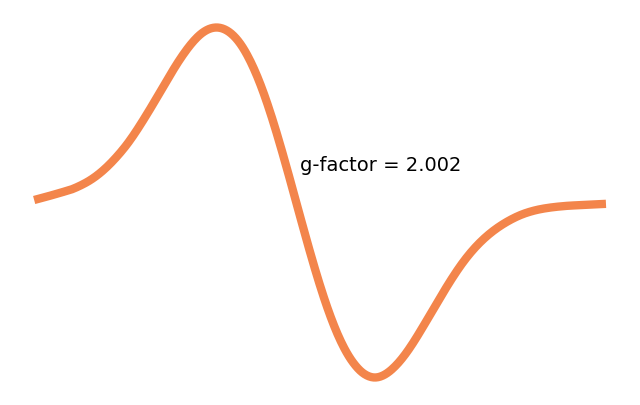

In [356]:
from statsmodels.nonparametric.smoothers_lowess import lowess
import seaborn as sns

fig = plt.figure(figsize=(8,5))
ax = plt.gca()


#plt.figure(figsize=(8,5))

#plt.vlines(335.38, -7500,7500)
#plt.vlines(335.17, -4500,4500


filtered = lowess(y_full.iloc[:,-1], x, is_sorted=True, frac=0.125, it=2)
ax.plot(filtered[:,0], filtered[:,1],label=time[-1], linewidth=6,color=cm.plasma(180))
ax.annotate('g-factor = 2.002 ', xy=(333.5, 0), xytext=(335.2, 1000.7))
            #arrowprops=dict(facecolor='black', shrink=100.01), fontsize=15)
#ax.legend(title="Время(мин)",fontsize =7,title_fontsize=9,bbox_to_anchor=(0.85, 0.5)) 
    
#plt.savefig('relaxation.png', bbox_inches='tight')
ax.axes.get_yaxis().set_visible(False)
ax.axes.get_xaxis().set_visible(False)
ax.axis('off')

plt.savefig(save_fig+'/single.png', bbox_inches='tight',transparent=True)
#plt.plot(x, y_full[y_names[10]], 'r')
#plt.plot(filtered[:,0], filtered[:,1], 'b')

###### a = []
fig = plt.figure(figsize=(10,5))
verts = []
for i,name in enumerate(y_names):
    q = []
    for j in range(1,len(x)):
        q.append(integrate.simps(y_full[name][:j], x[:j], dx=x[:j], even='first'))
    q_1 = []
    for k in range(1,len(x)):   
        q_1.append(integrate.simps(q[:k], x[:k], dx=x[:k], even='first'))
    a.append(max(q_1))
    plt.plot(x[:499],q_1,linewidth=2)
    

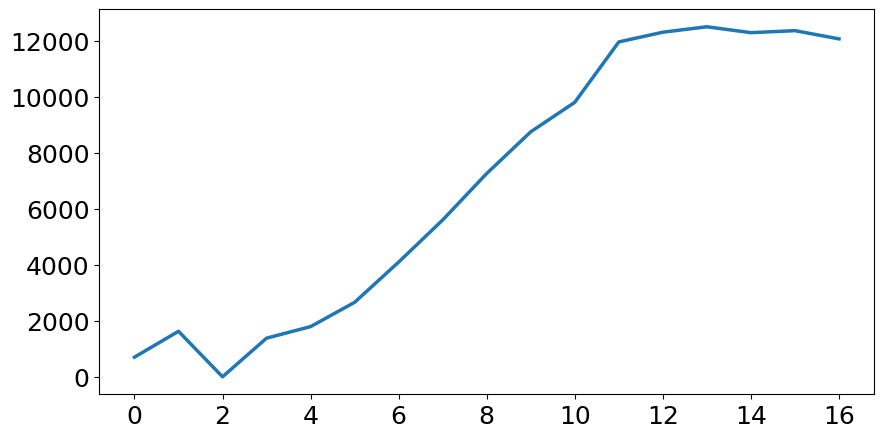

In [26]:
fig = plt.figure(figsize=(10,5))
plt.plot(range(len(a)), a)

# Relaxation

In [27]:
directory_2 = '/Users/smoluakov/Documents/DIPLOMA/EPR_DATA/16.03_CD220/EXCEL/relaxation'
list_of_files_2 = sorted(os.listdir(directory_2))
data_2 = pd.read_excel(directory_2+'/'+'FieldDelay_1-65min.xlsx')

In [28]:
x_2 = data_2['X (500 points)']

In [29]:
y_full_2 = data_2.drop(['X (500 points)','Y2','Y3'], axis=1)
y_names_2 = list(y_full_2.columns)

<AxesSubplot:xlabel='X (500 points)'>

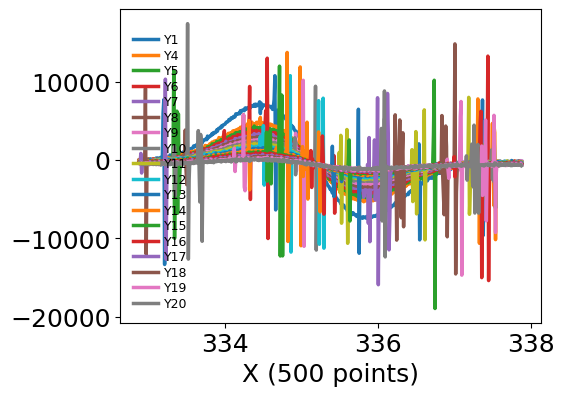

In [30]:
data_2.plot(x='X (500 points)', y=y_names_2)

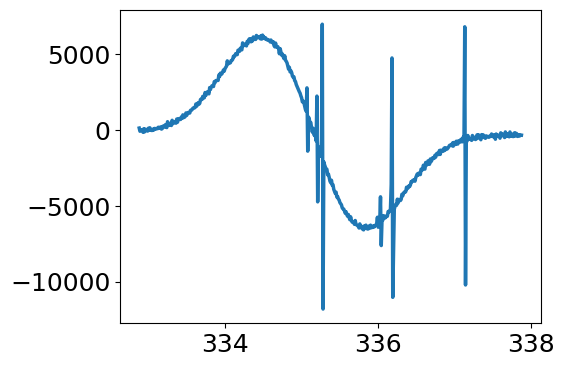

In [31]:
plt.plot(x_2,data_2['Y2'] )

In [32]:
colors = cmap(np.arange(cmap.N))
colors

NameError: name 'cmap' is not defined

In [33]:
for name in y_names_2:
    for i in range(1,len(y_full_2[name])):
        if abs(diff(y_full_2[name])[i]) < 700:
            y_full_2[name][i] = y_full_2[name][i]
        else:
            y_full_2[name][i] = (np.mean(y_full_2[name][i-5:i-3]))

In [35]:
cm.RdBu(255) == cm.RdBu(254)

False

Text(0.5, 0, 'Time(min)')

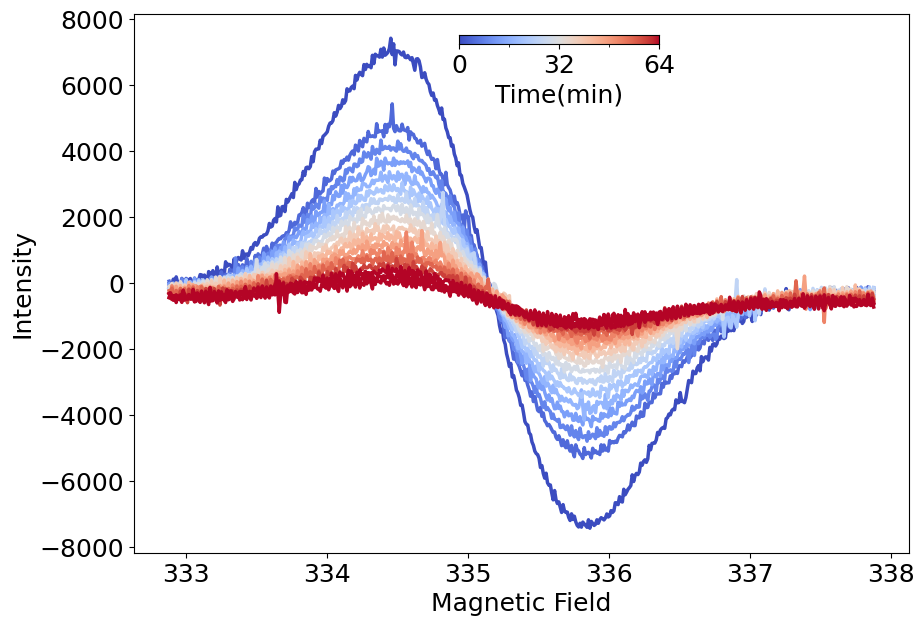

In [38]:
fig, ax = plt.subplots(figsize=(10,7))
plt.xlabel('Magnetic Field')
plt.ylabel('Intensity')
#plt.vlines(335.38, -7500,7500)
#plt.vlines(335.17, -7500,7500)

for i,name in enumerate(y_names_2):
    plt.plot(x_2, y_full_2[name], color=cm.coolwarm(i/15),label=name) # посчитал в экселе сколько между 335.17 и 335.38 точек
    #plt.legend()
cmap = plt.cm.get_cmap('coolwarm')
colors = cmap(np.arange(cmap.N))   
cmap = grayscale_cmap(cmap)
grayscale = cmap(np.arange(cmap.N))
#plt.imshow([colors], extent=[0, 10, 0, 1])    
    
newax = fig.add_axes([0.45, 0.35, 0.2, 0.5], anchor='NE')
newax.imshow([colors],origin='upper', extent=[0, 64, 0, 3])    
newax.axes.get_yaxis().set_visible(False)
#newax.yaxis.set_tick_params(which='minor', size=5, width=2, direction='in', left='on')
newax.xaxis.set_major_locator(mpl.ticker.MultipleLocator(32))
newax.xaxis.set_minor_locator(mpl.ticker.MultipleLocator(16))
newax.set_xlabel('Time(min)')
#newax.axis('off')

In [294]:
time_relax

array([ 1.        ,  4.70588235,  8.41176471, 12.11764706, 15.82352941,
       19.52941176, 23.23529412, 26.94117647, 30.64705882, 34.35294118,
       38.05882353, 41.76470588, 45.47058824, 49.17647059, 52.88235294,
       56.58823529, 60.29411765, 64.        ])

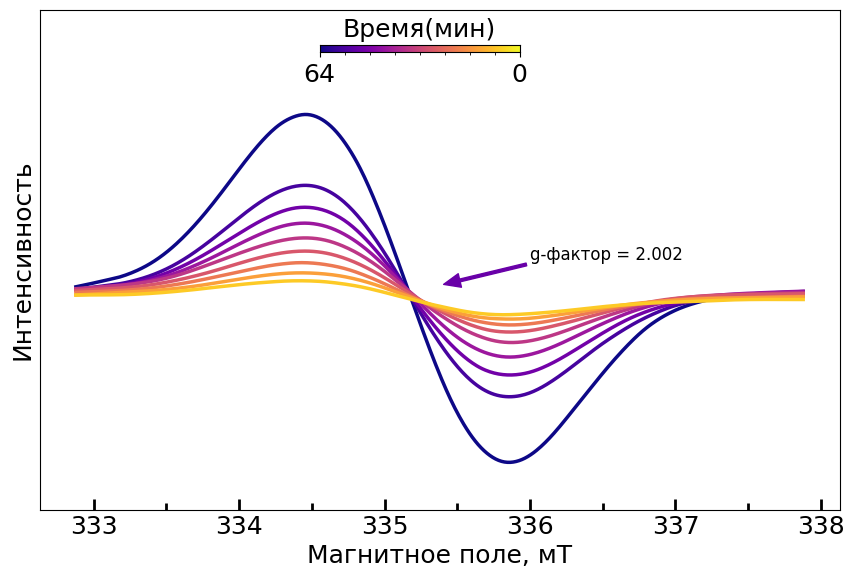

In [302]:
from statsmodels.nonparametric.smoothers_lowess import lowess
import seaborn as sns

fig = plt.figure(figsize=(8,5))
ax = plt.gca()
ax = fig.add_axes([0,0,1,1])

#plt.figure(figsize=(8,5))
plt.xlabel('Magnetic Field')
plt.ylabel('Intensity')
#plt.vlines(335.38, -7500,7500)
#plt.vlines(335.17, -4500,4500)

ax.xaxis.set_tick_params(which='major', size=8, width=2, direction='in', bottom='on')
ax.xaxis.set_tick_params(which='minor', size=5, width=2, direction='in', bottom='on')
ax.yaxis.set_tick_params(which='major', size=8, width=2, direction='in', left='on')
ax.yaxis.set_tick_params(which='minor', size=5, width=2, direction='in', left='on')


ax.xaxis.set_major_locator(mpl.ticker.MultipleLocator(1))
ax.xaxis.set_minor_locator(mpl.ticker.MultipleLocator(0.5))

#ax.yaxis.set_major_locator(mpl.ticker.MultipleLocator(3000))
#ax.yaxis.set_minor_locator(mpl.ticker.MultipleLocator(1500))

ax.set_xlabel('Магнитное поле, мТ')
ax.set_ylabel('Интенсивность')
ax.set_yticks([])


for i,name in enumerate(y_names_2[0::2]):
    #if i ==5:
    #    continue
    filtered = lowess(y_full_2[name], x_2, is_sorted=True, frac=0.125, it=2)
    ax.plot(filtered[:,0], filtered[:,1],color=cm.plasma(i/9),label=time[i])
    #ax.legend(title="Время(мин)",fontsize =7,title_fontsize=9,bbox_to_anchor=(0.85, 0.5)) 
ax.set_ylim([-9000, 11000])
ax.annotate('g-фактор = 2.002 ', xy=(335.4, 0), xytext=(336, 1000.7),
            arrowprops=dict(color=cm.plasma(50),width=2,headwidth=10, shrink=0.01), fontsize=12)
    
cmap = plt.cm.get_cmap('plasma')
colors = cmap(np.arange(cmap.N))   
cmap = grayscale_cmap(cmap)
grayscale = cmap(np.arange(cmap.N))    
#plt.savefig('relaxation.png', bbox_inches='tight')
newax = fig.add_axes([0.35, 0.73, 0.25, 0.2], anchor='NE')
newax.imshow([colors],origin='upper', extent=[64, 0, 0.5, 3],)    
newax.axes.get_yaxis().set_visible(False)
#newax.yaxis.set_tick_params(which='minor', size=5, width=2, direction='in', left='on')
newax.xaxis.set_major_locator(mpl.ticker.MultipleLocator(8))
newax.xaxis.set_minor_locator(mpl.ticker.MultipleLocator(8))
newax.set_xticks([0,64])
newax.set_title('Время(мин)')
#plt.plot(x, y_full[y_names[10]], 'r')
#plt.plot(filtered[:,0], filtered[:,1], 'b')

plt.savefig(save_fig+'/relax.png', bbox_inches='tight')

Text(0.5, 1.0, 'Time(min)')

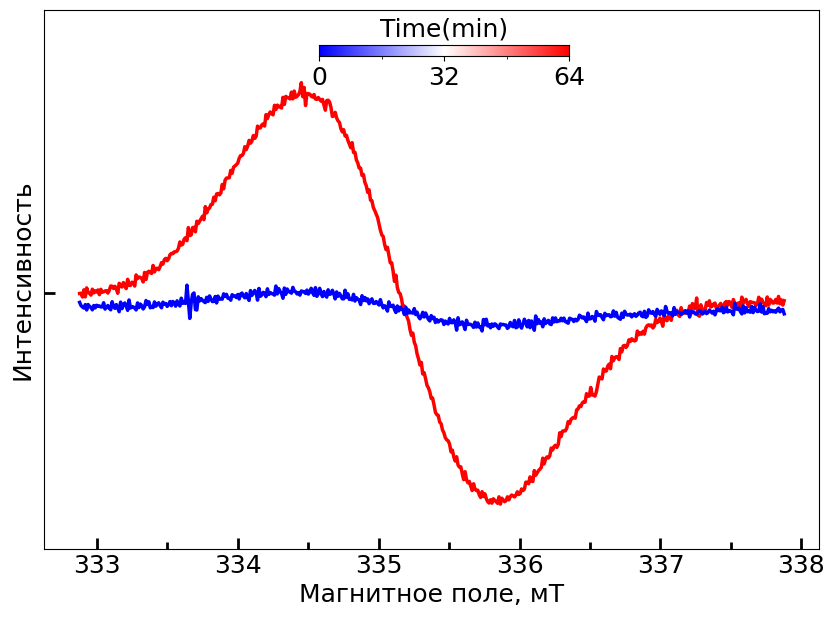

In [155]:

fig, ax = plt.subplots(figsize=(10,7))
plt.xlabel('Magnetic Field')
plt.ylabel('Intensity')
#plt.vlines(335.38, -7500,7500)
#plt.vlines(335.17, -7500,7500)
#for name in y_names_2:
    #plt.plot(x_2, y_full_2[name], cmap=plt.cm.get_cmap('RdBu', 1),label=name) # посчитал в экселе сколько между 335.17 и 335.38 точек
    #plt.legend()
    
ax.xaxis.set_tick_params(which='major', size=8, width=2, direction='in', bottom='on')
ax.xaxis.set_tick_params(which='minor', size=5, width=2, direction='in', bottom='on')
ax.yaxis.set_tick_params(which='major', size=8, width=2, direction='in', left='on')
ax.yaxis.set_tick_params(which='minor', size=5, width=2, direction='in', left='on')


ax.xaxis.set_major_locator(mpl.ticker.MultipleLocator(1))
ax.xaxis.set_minor_locator(mpl.ticker.MultipleLocator(0.5))

ax.yaxis.set_major_locator(mpl.ticker.MultipleLocator(90000))
#ax.yaxis.set_minor_locator(mpl.ticker.MultipleLocator(1500))

ax.set_xlabel('Магнитное поле, мТ')
ax.set_ylabel('Интенсивность')    
    
ax.plot(x_2, y_full_2['Y1'], color='red',label=name) # посчитал в экселе сколько между 335.17 и 335.38 точек
ax.plot(x_2, y_full_2['Y20'], color='blue',label=name) # посчитал в экселе сколько между 335.17 и 335.38 точек
ax.set_ylim([-9000, 10000])
ax.axes.yaxis.set_ticklabels([])
cmap = plt.cm.get_cmap('bwr')
colors = cmap(np.arange(cmap.N))   
cmap = grayscale_cmap(cmap)
grayscale = cmap(np.arange(cmap.N))
#plt.imshow([colors], extent=[0, 10, 0, 1])    


#he dimensions [left, bottom, width, height] of the new Axes. All quantities are in fractions of figure width and height.
newax = fig.add_axes([0.40, 0.63, 0.25, 0.2], anchor='NE')
newax.imshow([colors],origin='upper', extent=[0, 64, 0, 3])    
newax.axes.get_yaxis().set_visible(False)
#newax.yaxis.set_tick_params(which='minor', size=5, width=2, direction='in', left='on')
newax.xaxis.set_major_locator(mpl.ticker.MultipleLocator(32))
newax.xaxis.set_minor_locator(mpl.ticker.MultipleLocator(16))
newax.set_title('Time(min)')

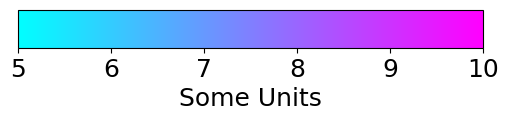

In [357]:
fig, ax = plt.subplots(figsize=(6, 1))
fig.subplots_adjust(bottom=0.5)

cmap = mpl.cm.cool
norm = mpl.colors.Normalize(vmin=5, vmax=10)

cb1 = mpl.colorbar.ColorbarBase(ax, cmap=cmap,
                                norm=norm,
                                orientation='horizontal')
cb1.set_label('Some Units')


In [276]:
time_relax = np.linspace(1, 64, 18)

In [294]:
len(time_relax)

18

In [295]:
len(y_names_2)

18

In [301]:
y_full_2['Y1']

0       -7.135908
1        1.212598
2     -131.859711
3      120.999474
4     -126.914833
          ...    
495   -111.717964
496   -370.514709
497   -231.976440
498   -416.083618
499   -263.810730
Name: Y1, Length: 500, dtype: float64

In [310]:
len(y_names_2)


18

In [313]:
len(time_relax)

18

[]

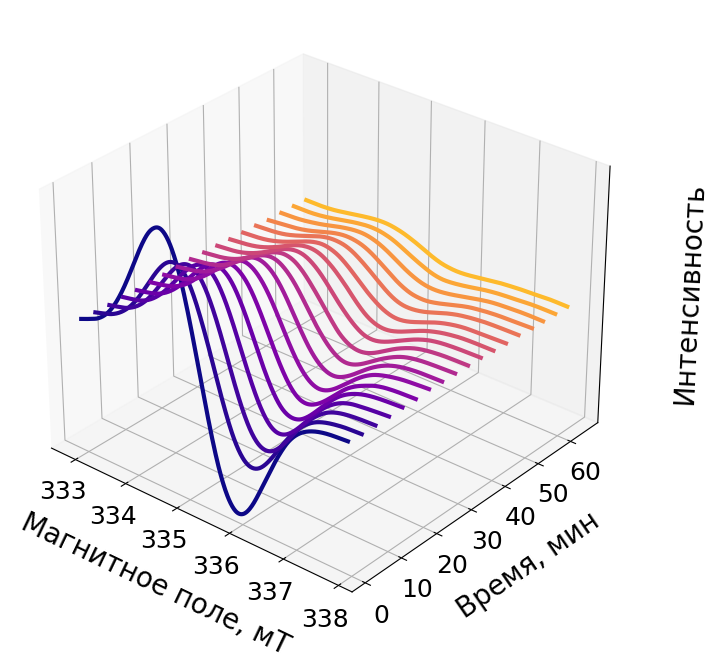

In [291]:
from matplotlib.collections import PolyCollection

fig = plt.figure(figsize=(8,8))
verts = []
ax = fig.add_subplot(projection='3d')
#for name in y_names:
ax.view_init(30, -50)
for i,name in enumerate(y_names_2):
    filtered = lowess(y_full_2[name], x_2, is_sorted=True, frac=0.125, it=2)
    ax.plot(filtered[:498,0], [time_relax[i]]*len(x_2[:498]),filtered[:498,1],color=cm.plasma(i/20),label=name, linewidth=3)
    #ax.plot(x_2[6:-21],  [i]*len(x_2[6:-21]),y_full_2[name][6:-21],)

ax.set_xlabel('Магнитное поле, мT', fontsize=20,labelpad=15)
ax.set_ylabel('Время, мин',fontsize=20,labelpad=15)
ax.set_zlabel('Интенсивность',fontsize=20, labelpad=15);
ax.set_zticks([])

#plt.savefig(save_fig+'/relaxation_3d_withot_zaxis.png', bbox_inches='tight')

In [37]:

from matplotlib.colors import LinearSegmentedColormap

def grayscale_cmap(cmap):
    """Return a grayscale version of the given colormap"""
    cmap = plt.cm.get_cmap(cmap)
    colors = cmap(np.arange(cmap.N))
    
    # convert RGBA to perceived grayscale luminance
    # cf. http://alienryderflex.com/hsp.html
    RGB_weight = [0.299, 0.587, 0.114]
    luminance = np.sqrt(np.dot(colors[:, :3] ** 2, RGB_weight))
    colors[:, :3] = luminance[:, np.newaxis]
        
    return LinearSegmentedColormap.from_list(cmap.name + "_gray", colors, cmap.N)
    

def view_colormap(cmap):
    """Plot a colormap with its grayscale equivalent"""
    cmap = plt.cm.get_cmap(cmap)
    colors = cmap(np.arange(cmap.N))
    
    cmap = grayscale_cmap(cmap)
    grayscale = cmap(np.arange(cmap.N))
    
    fig, ax = plt.subplots(2, figsize=(6, 2),
                           subplot_kw=dict(xticks=[], yticks=[]))
    ax[0].imshow([colors], extent=[0, 10, 0, 1])
    ax[1].imshow([grayscale], extent=[0, 10, 0, 1])

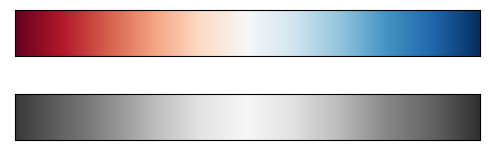

In [327]:
view_colormap('RdBu')

In [370]:
!pip install colour

You should consider upgrading via the '/Library/Frameworks/Python.framework/Versions/3.8/bin/python3.8 -m pip install --upgrade pip' command.


In [241]:
from colour import Color
red = Color("blue")
colors = list(red.range_to(Color("yellow"),10))

In [242]:
red

<Color blue>

In [243]:
Color("green")

<Color green>

In [244]:
colors[1:-1]

[<Color #05f>,
 <Color #0af>,
 <Color cyan>,
 <Color #0fa>,
 <Color #0f5>,
 <Color lime>,
 <Color #5f0>,
 <Color #af0>]

In [337]:
cmap = plt.cm.get_cmap('RdBu').N
cmap

256

In [368]:
rgb = cm.get_cmap(cmap)(x)[np.newaxis, :, :3]
ab = cspace_converter("sRGB1", "CAM02-UCS")(rgb)

NameError: name 'cspace_converter' is not defined

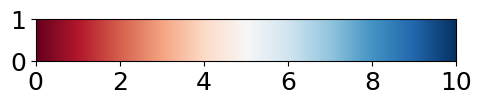

In [342]:
cmap = plt.cm.get_cmap('RdBu')
colors = cmap(np.arange(cmap.N))   
cmap = grayscale_cmap(cmap)
grayscale = cmap(np.arange(cmap.N))
plt.imshow([colors], extent=[0, 10, 0, 1])

In [ ]:
cmap=plt.cm.get_cmap('cubehelix', 6)

# Двойные интегралы из спинозы

In [305]:
path = "/Users/smoluakov/Documents/DIPLOMA/EPR_DATA/16.03_CD220/EXCEL/relaxation/double_integrals_spinoza.xlsx"
data = pd.read_excel(path)

In [306]:
doub_int = []
for column in data.columns[1:]:
    doub_int.append(np.max(data[column]))

In [307]:
len(doub_int)

19

In [308]:
time = list(range(1,58,3))

In [309]:
len(time)

19

In [310]:
time = np.linspace(1, 65, 19)

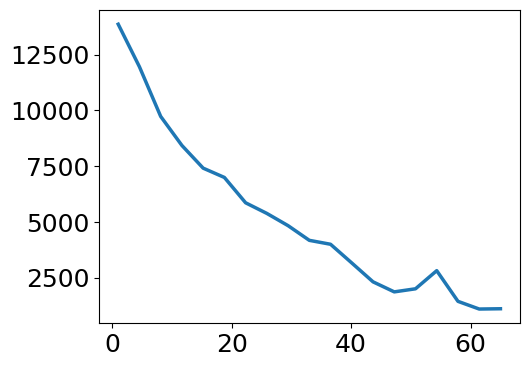

In [311]:
plt.plot(time, doub_int)

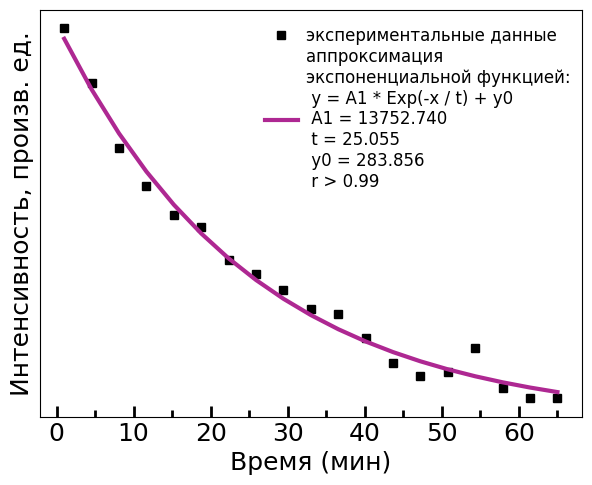

In [364]:
def exponenial_func_1(x, a, b, c):
    return a*np.exp(x/(-b))+c

popt, pcov = scipy.optimize.curve_fit(exponenial_func_1, time,doub_int, bounds=(0, [17000, 30, 1000]))

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.xaxis.set_tick_params(which='major', size=8, width=2, direction='in', bottom='on')
ax.xaxis.set_tick_params(which='minor', size=5, width=2, direction='in', bottom='on')
ax.yaxis.set_tick_params(which='major', size=8, width=2, direction='in', left='on')
ax.yaxis.set_tick_params(which='minor', size=5, width=2, direction='in', left='on')

ax.xaxis.set_major_locator(mpl.ticker.MultipleLocator(10))
ax.xaxis.set_minor_locator(mpl.ticker.MultipleLocator(5))

#ax.yaxis.set_major_locator(mpl.ticker.MultipleLocator(2000))
#ax.yaxis.set_minor_locator(mpl.ticker.MultipleLocator(1000))

ax.set_xlabel('Время (мин)')
ax.set_ylabel('Интенсивность, произв. ед.')
ax.set_yticks([])

ax.plot(time,doub_int,'s',markersize=6,markerfacecolor='black',markeredgecolor='black',label='экспериментальные данные')
ax.plot(time, exponenial_func_1(time, *popt),linewidth= 3, color=cm.plasma(100),
        label='аппроксимация\nэкспоненциальной функцией:\n y = A1 * Exp(-x / t) + y0 \n A1 = %5.3f\n t = %5.3f\n y0 = %5.3f\n r > 0.99' % tuple(popt))    

#ax.text(10,0.25,'(б)',fontsize=25)
#ax.set_title('Кинетика изменения оптической плотности в полосе поглощения дикатион-радикала в процессе анодной поляризации', pad=14, fontsize=20 )
ax.legend(bbox_to_anchor=(1.01, 1),fontsize =12,title_fontsize=14)
plt.savefig(save_fig+'/expfit_relax_rus_color_emptyY.png', transparent=False, bbox_inches='tight') 
plt.show()

In [107]:
popt

array([13752.73959894,    25.05475482,   283.85552329])

In [106]:
my_rho = np.corrcoef(doub_int, exponenial_func_1(time, *popt))
my_rho

array([[1.        , 0.99428195],
       [0.99428195, 1.        ]])

### Двойные интегралы на сырых данных. Неудача, т.к необходимо бейзлайн коррекция и фиттинг гауссом

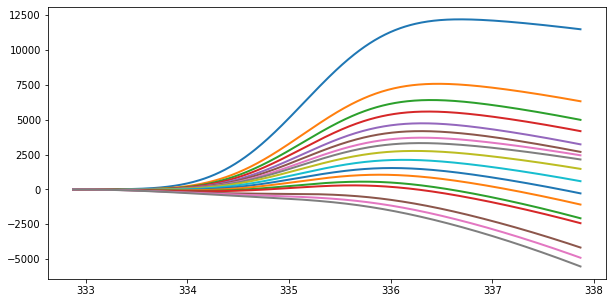

In [666]:
a_2 = []
fig = plt.figure(figsize=(10,5))
verts_2 = []
for i,name in enumerate(y_names_2):
    q_2 = []
    for j in range(1,len(x_2)):
        q_2.append(integrate.simps(y_full_2[name][:j], x_2[:j], dx=x_2[:j], even='first'))
    q_3 = []
    for k in range(1,len(x_2)):   
        q_3.append(integrate.simps(q_2[:k], x_2[:k], dx=x_2[:k], even='first'))
    a_2.append(max(q_3))
    plt.plot(x_2[:499],q_3,linewidth=2)
    

In [647]:
a_2[:-4]

[12196.47571957673,
 7573.972214900372,
 6409.390169352884,
 5583.981305840808,
 4740.536110778666,
 4179.734982455646,
 3709.2081826445474,
 3321.9426206648113,
 2759.4177721492406,
 2120.7008715374295,
 1532.7960054088257,
 1053.0460908571881,
 555.4236189941382,
 289.137700848634]

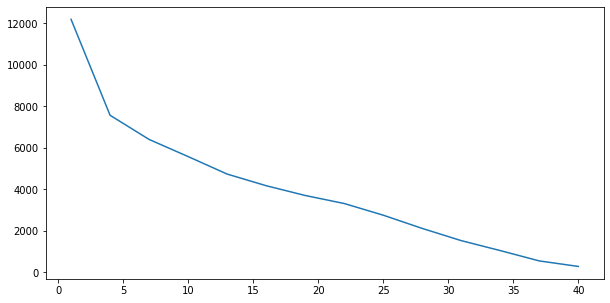

In [651]:
fig = plt.figure(figsize=(10,5))
plt.plot(range(1,43,3), a_2[:-4])

In [653]:
def exponenial_func_1(x, a, b, c):
    return a*np.exp(x/(-b))+c

popt, pcov = scipy.optimize.curve_fit(exponenial_func_1, range(1,43,3), a_2[:-4])

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/scipy/optimize/minpack.py:807: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


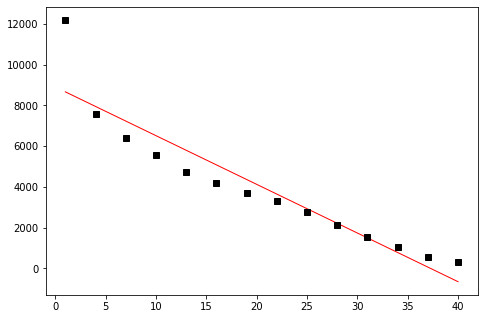

In [654]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])

ax.plot(range(1,43,3), exponenial_func_1(range(1,43,3), *popt),linewidth= 1, color='red',
        label=' Fitted Function:\n y = A1 * Exp(-x / t) + y0 \n A1 = %5.3f\n t = %5.3f\n y0 = %5.3f\n r = 0.999' % tuple(popt))    
ax.plot(range(1,43,3), a_2[:-4],'s',markersize=6,markerfacecolor='black',markeredgecolor='black',label='experiment')

In [655]:
popt

array([-50031098.34616727,   -209309.34646987,  50040000.61345528])

In [632]:
pcov

array([[-5.32443621e+20, -9.37380642e+17,  5.32443620e+20],
       [-9.37380642e+17, -1.65028253e+15,  9.37380641e+17],
       [ 5.32443620e+20,  9.37380641e+17, -5.32443619e+20]])

In [672]:
a_3 = [12196.47571957673,10000, 8200, 7573.972214900372,
 6409.390169352884,
 5583.981305840808,
 4740.536110778666,
 4179.734982455646,
 3709.2081826445474,
 3321.9426206648113,
 2759.4177721492406,
 2120.7008715374295,
 1532.7960054088257,
 1053.0460908571881,
 555.4236189941382,
 289.137700848634,100,50,20,0]

In [670]:
a_2

[12196.47571957673,
 7573.972214900372,
 6409.390169352884,
 5583.981305840808,
 4740.536110778666,
 4179.734982455646,
 3709.2081826445474,
 3321.9426206648113,
 2759.4177721492406,
 2120.7008715374295,
 1532.7960054088257,
 1053.0460908571881,
 555.4236189941382,
 289.137700848634,
 0.0,
 0.0,
 0.0,
 0.0]

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/scipy/optimize/minpack.py:807: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


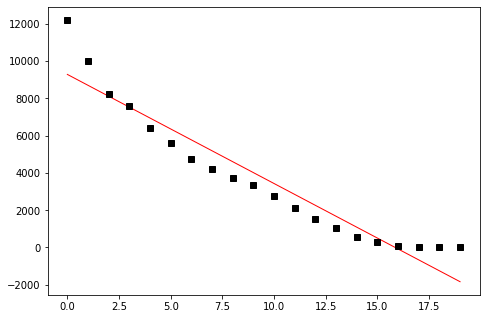

In [674]:
popt= 0
def exponenial_func_1(x, a, b, c):
    return a*np.exp(x/(-b))+c

popt, pcov = scipy.optimize.curve_fit(exponenial_func_1, range(len(a_3)), a_3)

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])

ax.plot(range(len(a_3)), exponenial_func_1(range(len(a_3)), *popt),linewidth= 1, color='red',
        label=' Fitted Function:\n y = A1 * Exp(-x / t) + y0 \n A1 = %5.3f\n t = %5.3f\n y0 = %5.3f\n r = 0.999' % tuple(popt))    
ax.plot(range(len(a_3)), a_3,'s',markersize=6,markerfacecolor='black',markeredgecolor='black',label='experiment')

In [675]:
popt

array([-86937598.17175092,   -148677.59902721,  86946873.19261864])

In [710]:
from BaselineRemoval import BaselineRemoval

input_array=[10,20,1.5,5,2,9,99,25,47]
polynomial_degree=2 #only needed for Modpoly and IModPoly algorithm

baseObj=BaselineRemoval(y_full_2['Y1'][:-21])

Modpoly_output=baseObj.ModPoly(polynomial_degree)
Imodpoly_output=baseObj.IModPoly(polynomial_degree)
Zhangfit_output=baseObj.ZhangFit()

#print('Original input:',input_array)
#print('Modpoly base corrected values:',Modpoly_output)
#print('IModPoly base corrected values:',Imodpoly_output)
#print('ZhangFit base corrected values:',Zhangfit_output)

WARING max iteration reached!


## Попытки бейзлайн коррекции

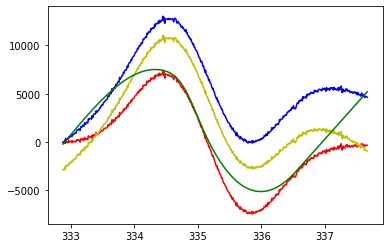

In [711]:
plt.plot(x_2[:-21],y_full_2['Y1'][:-21], 'r')
plt.plot(x_2[:-21], Modpoly_output, 'b')
plt.plot(x_2[:-21], Imodpoly_output, 'y')
plt.plot(x_2[:-21], base[:-21], 'g')


In [685]:
from scipy import sparse
from scipy.sparse.linalg import spsolve

def baseline_als(y, lam, p, niter=10):
    L = len(y)
    D = sparse.csc_matrix(np.diff(np.eye(L), 2))
    w = np.ones(L)
    for i in range(niter):
        W = sparse.spdiags(w, 0, L, L)
        Z = W + lam * D.dot(D.transpose())
        z = spsolve(Z, w*y)
        w = p * (y > z) + (1-p) * (y < z)
    return z



In [704]:
base = baseline_als(y_full_2['Y1'],2,1)

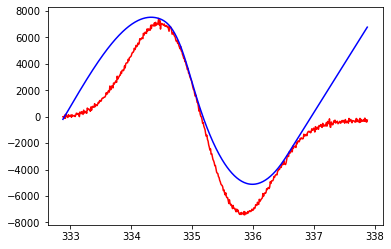

In [705]:
plt.plot(x_2,y_full_2['Y1'], 'r')
plt.plot(x_2, base, 'b')

## Сглаживание сырых данных 

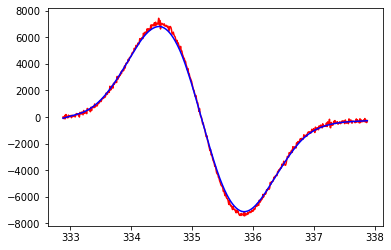

In [729]:
from statsmodels.nonparametric.smoothers_lowess import lowess


filtered = lowess(y_full_2['Y1'], x_2, is_sorted=True, frac=0.125, it=2)

plt.plot(x_2, y_full_2['Y1'], 'r')
plt.plot(filtered[:,0], filtered[:,1], 'b')

In [730]:
q = []
for i in range(1,len(filtered[:,0])):
    q.append(integrate.simps(filtered[:,1][:i], filtered[:,0][:i], dx=filtered[:,0][:i], even='first'))

q_1 = []
for i in range(1,len(filtered[:,0])):
    q_1.append(integrate.simps(q[:i], filtered[:,0][:i], dx=filtered[:,0][:i], even='first'))

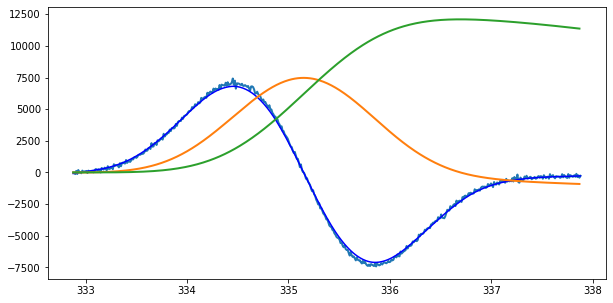

In [731]:
plt.figure(figsize=(10,5))
plt.plot(x_2,y_full_2['Y1'], linewidth=2)
plt.plot(filtered[:,0], filtered[:,1], 'b')
plt.plot(filtered[:,0][:499],q,linewidth=2)
plt.plot(filtered[:,0][:499],q_1,linewidth=2)